# **Redes Neurais Convolucionais**

Neste material, vamos introduzir os principais conceitos e a implementação de **redes neurais convolucionais (convolutional neural networks - CNN)**.

## **1. Introdução**

Para atacar determinados problemas, precisamos modificar a **arquitetura** da rede neural empregada. Uma dessas modificações é dada por meio das redes convolucionais, sendo estas utilizadas principalmente para imagens.

Considere a imagem a seguir:

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/807be939-f81f-425c-a974-341065fb1131.jpg" width="20%" text="https://www.nps.gov/lacl/learn/nature/animals.htm."/>
</center>

*Uma raposa em seu habitat. Mas você não precisou ler esta legenda para reconhecer isto... *

Para humanos, é fácil reconhecer que a imagem se trata de uma raposa. E é bem provável que ainda conseguiríamos identificar a imagem de uma raposa em representações mais gerais, como, por exemplo, se ela estivesse de frente ao invés de estar de perfil. Esta generalização, embora fácil pra humanos, é um problema **muito complicado para as redes neurais de arquitetura mais simples**, como a rede neural densa que construímos anteriormente.

Lembre que uma imagem é representada por uma **matriz de números**.  Para resolução de problemas em que a base de dados é uma imagem, seja para rede neural ou outros problemas de machine learning (como random forest e svm), os atributos de entrada são cada pixel da imagem. A imagem da raposa acima tem 700 pixels de altura e 700 pixels de largura. Ou seja, o quadrado inteiro da imagem tem 700 x 700 = **490.000 pixels**. Lembre-se também de que uma foto colorida é composta por **3 canais de cores**, vermelho, verde e azul (**RGB**):

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8ef5da91-7dfa-46b4-b84d-7fa5af75c2a6.png" width="70%"/>
</center>

 Assim, nossa imagem terá: ( 700 * 700 * 3 = 1.470.000) inputs! Se optarmos por utilizar como primeira camada oculta uma camada densa com 1000 neurônios, teremos uma matriz de pesos para a primeira camada de: 1.470.000 (quantidade de entradas) * 1000 (quantidade de neurônios)= 1.470.000.000) elementos: cerca de **1.5 bilhão de parâmetros só para primeira camada**! Com essa quantidade enorme de parâmetros é extremamente difícil não cair em **overfitting** mesmo com uma quantidade **muito grande de observações no conjunto de treinamento**.

Além disso, há um outro problema: quando utilizamos essa imagem em uma rede neural, fatiamos a imagem para montar o vetor de input, simplesmente empilhando as colunas da matriz, com isso perdemos muita informação espacial relevante. Pense no pequeno bloco de pixels que corresponde ao olho da raposa: a **posição dos pixels** e de **seus vizinhos mais próximos** carregam **muita informação** sobre o objeto "olho":

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/79937950-01a6-4bb8-bca0-bb0419e7f869.png" width="25%"/>
</center>

Enfim, seja pela quantidade imensa de parâmetros (tendência ao overfitting), seja pela perda de muita informação espacial, precisamos de um novo método que possa melhorar a forma que a rede neural **trabalha com inputs pictóricos**.

## **2. Filtros**

A introdução de filtros de imagem (ou *kernels*) antes de passar a imagem para uma rede neural convencional teve uma importância crucial para resolver os desafios listados na seção anterior.

Os filtros nos permitem detectar **bordas na imagem**, ao mesmo tempo em que mantêm a quantidade de parâmetros relativamente **baixa**. Como as próprias imagens, os filtros são representados por **pequenas matrizes**, com certos padrões numéricos únicos. Abaixo, temos dois exemplos de filtros: o primeiro serve para detectar bordas verticais na imagem; o segundo, horizontais. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/83a95036-3ad7-4280-85ad-32d0d3bb567f.png" width="30%"/>
</center>

Ao aplicar filtro em uma imagem, temos uma image pré-processada que pode realçar ou simplificar determinadas features. Por exemplo, se tivermos a dada imagem do palácio abaixo, podemos aplicar filtros para reassaltar as bordas e estrutura geral do palácio mais importantes por meio de filtros de bordas.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/85/Filtro_bordes_original_laplace_sobel.jpg?20100424174950" width="90%"/>
</center>

Semelhantemente, podemos aplicar filtros de suavização em que, nos permite, por exemplo, deixar o fundo da imagem da webcam desfocado em uma aula online. 

Esses filtros são amplamente utilizados em processamento digital de imagens, além de redes convolucionais, e a aplicação desses filtros tem como base a operação de convolução.

### **2.1 Convolução**

A operação que realizamos entre a matriz da imagem e um determinado filtro é chamada de **convolução**. 

Seja a matriz de uma imagem P&B de 6 pixels x 6 pixels e o filtro de bordas verticais que apresentamos. Para calcular a operação de convolução, denotada por um asterisco *, entre a imagem e o filtro:

- começamos "sobrepondo" o filtro no canto superior direito da matriz da imagem;
- calculamos o produto, elemento por elemento, do filtro com o trecho da imagem sobreposto e somamos tudo. No exemplo, abaixo, temos:

 1 * 2 + 1 * 7 + 1 * 0 + 0 * 1 + 0 * 4 + 0 * 9 + (-1) * 0 + (-1) * 2 + (-1) * 10 = -3 

O resultado, -3, será o primeiro elemento da matriz 4x4 resultante da convolução, como ilustra a 1ª etapa da figura abaixo;

- a seguir, deslizamos nosso filtro uma casa para direita sobre a matriz da imagem e reproduzimos o cálculo de soma dos produtos; neste caso, dá -8 (2ª etapa);
- quando cobrirmos todas essas colunas nessas 3 primeiras linhas, voltamos ao canto esquerdo, **descemos** 1 linha e continuamos, até a 16ª etapa, quando preenchemos toda a matriz-resultado à esquerda. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/1f634646-1d13-44b9-945c-c65a8489cb94.png" width="70%"/>
</center>

**Nota**: o número de casas "puladas" a cada etapa, chamado *stride*, não precisa ser 1. Também podemos controlar o tamanho final da nossa matriz resultado da convolução. Ela não precisa ser menor (4x4) do que a original (6x6); podemos ajustar o *padding*, outro hiperparâmetro, para conservar a dimensão original. 

<center>
<img src=https://miro.medium.com/max/658/0*jLoqqFsO-52KHTn9.gif width=400>
</center>

### **2.2 Imagens coloridas**

Se a imagem for **colorida**, em vez de uma matriz de imagem e uma de filtro, cada uma delas será composta de 3 matrizes, uma para cada cor: vermelha, verde e azul. O procedimento de cálculo é como no caso da imagem P&B, com a diferença de que todos os 3 filtros vão percorrer, juntos, cada um uma camada de cor. Em cada iteração, seus resultado também serão somados, de modo que a matriz final continuará tendo dimensão 4x4. A figura abaixo demonstra o processo: 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/73c5d655-2984-4b31-bddb-f55da57c5bbe.png" width="80%"/>
</center>

### **2.3 Filtros em CNNs**
Conforme descrito no início do tópico 2, os filtros são utilizados há anos em diferentes contextos, não apenas em redes convolucionais.

Isso ocorre porque, devido à **capacidade dos filtros de aguçar e/ou diminuir informação**, como trabalhar com imagens em geral é uma tarefa de grande complexidade devido à quantidade de entradas, é comum utilizarmos diferentes técnicas de processamento digital de imagens para **extrair features mais importantes**, sendo esta imagem resultante utilizada como entrada de um classificador por exemplo, como rede neural ou um SVM. 

Existem diversas **técnicas de pré-processamento de imagens** que podem ser utilizadas sendo a maioria delas é baseada na utilização de filtros. Entretanto, esse **processo é custoso porque, em geral, é algo definido experimentalmente**, isto é, cabe ao profissional identificar quais melhores filtros se encaixam como extratores de features para um dado problema. 

Além disso, em cenários reais tem-se uma base de dados com imagens de diferentes formas. Por exemplo, para classificar placas de trânsito, podemos ter fotos da estrada em diferentes horários, ou clima (sol, chuva, neve, nublado), distâncias, ou ainda podemos ter placas mais antigas, cujo material pode estar desgastado com o tempo.

Todos esses cenários devem estar inclusos no pré-processamento e, como esse processo é manual, é consideravelmente **custoso  encontrar uma combinação de filtros que generalize bem para todos os contextos**. Por fim, caso exista qualquer modificação da base de dados, existe sempre o risco de repetir todo o processo para encontrar novos filtros.

Sendo assim, visando reduzir esse processo, as redes convolucionais "agregam" este pré-processamento na própria rede, sendo o objetivo dessas redes **aprender a combinação de filtros que mais adequada para o problema desejado**. Isso reduz consideravelmente o processo manual e permite uma maior capacidade de generalização.

<center>
<img src="https://semiengineering.com/wp-content/uploads/2018/01/MLvsDL.png" width="60%"/>
</center>

E como as redes convolucionais aprendem a combinação de filtros mais adequada? Lembremos que, em uma rede tradicional (também conhecida como MLP ou rede neural multicamada), tem-se uma estrutura **em camadas**, em que os neurônios possuem pesos que serão aprendidos de forma a representar matematicamente a saída em termos dos atributos de entrada do problema.

<center>
<img src="https://uploads-ssl.webflow.com/5e6b6ac0d1fd2b1f242cc0cb/5f201fc59a54002670de36a4_5eac2bb7d3cad50315947c84_Untitled-3.jpg" width="45%"/>
</center>

**Em uma rede convolucional, esses pesos representam os números da matriz do filtro**. Por exemplo, em um filtro de bordas verticais, temos como valores desse filtro a matriz [1,0,-1], repetido em diferentes linhas. Em CNNs, cada valor é um peso que deverá ser aprendido ao longo do treinamento da rede.

Neste exemplo, podemos pensar que a rede inicie um filtro com valores aleatórios e, durante o aprendizado, esses pesos sejam otimizados, até chegar nos valores do filtro de bordas verticais. Isso indica que, para a rede, essa combinação de valores gera um filtro que irá extrair as features de uma forma significariva para o problema.

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/83a95036-3ad7-4280-85ad-32d0d3bb567f.png" width="30%"/>
</center>

Com isto, ao invés de termos pesos, cada um associado a uma entrada da imagem, temos uma pequena matriz de pesos (como dimensão 3x3 por exemplo), que é aplicada ao longo da imagem, totalizando 9 pesos. Além disso, por meio dessa estrutura podemos trabalhar com imagens ao invés de um vetor de inputs, permitindo que a rede possa aprender a relação espacial entre as features.

## **3. Múltiplos filtros**

Para identificar formas mais complexas, não basta apenas um único filtro, vertical ou horizontal. Na prática, queremos poder ter N filtros, cada um responsável por uma forma específica. 

Conforme ilustra a próxima figura: para cada filtro, aplicamos o processo de convolução. Ao fim, teremos **N matrizes bidimensionais**, que podemos empilhar para formar uma nova matriz tridimensional e, se quisermos, continuarmos aplicando a operação de convolução.

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/8baa30ea-9867-4bb6-88c8-2f23c9465bf3.png" width="100%"/>
</center>

## **4. Max Pooling**

Outros procedimentos bastante usados são os de amostragem, entre os quais o mais usado é o **max pooling**. Ele consiste em particionar a imagem em blocos (conjuntos de pixels) e, para cada um desses blocos, ele **retorna o maior valor entre os pixels.**

Imagine que tomamos o primeiro bloco 3x3 de uma imagem (bloco do canto superior esquerdo), que tem como valor dos pixels: $$( (70, 90, 95, 62, 57, 1, 41, 68, 53) )$$.  Se aplicarmos o max pooling a este bloco, obteremos 95, que é o maior elemento do bloco.

Se repetirmos a operação para toda a matriz da imagem, o que obteremos no fim é uma nova matriz, menor do que a original, apenas com os **pixels de valores mais altos dela**. Assim, max pooling pode ser visto como forma de **compressão da imagem original**.

Sendo assim, esse recurso é bastante utilizado para reduzirmos a quantidade de features que não são muito significativas para o problema através de agregação dos dados. Outro pooling muito utilizado é o **average pooling**.

O average pooling produz mapas de features mais suaves e desfocados enquanto o max pooling produz mapas de features mais nítidos e descontínuos. No entanto, não é garantido que qualquer uma das representações seja a melhor para nossas aplicações.

<center>
<img src=https://production-media.paperswithcode.com/methods/MaxpoolSample2.png width=400 text="https://paperswithcode.com/method/max-pooling">
</center>

A vantagem dessa camada é que ela **compacta a informação quase sem gerar custo para a rede neural**. Isso porque ela reduz pela metade, quando o pooling é feito com matrizes 2x2, e **não possui nenhum peso ou parâmetro a ser aprendido pela rede**.

#### Efeito do Max Pooling na imagem

<center>
<img src=https://gudgud96.github.io/img/mean-vs-max-pool.png width=700 text="https://gudgud96.github.io/2020/11/25/param-pooling">
</center>

Drawback de utilizar max e average pooling

<img src=https://www.researchgate.net/profile/Hanli-Wang-2/publication/300020038/figure/fig2/AS:404961465782275@1473561745471/Toy-example-illustrating-the-drawbacks-of-max-pooling-and-average-pooling.png text="https://www.researchgate.net/figure/Toy-example-illustrating-the-drawbacks-of-max-pooling-and-average-pooling_fig2_300020038">

## **5. Arquitetura de uma rede neural convolucional**

Por fim, juntando tudo que aprendemos até aqui, podemos construir uma rede neural convolucional (CNN, na sigla em inglês) completa. 

A figura abaixo ilustra um modelo genérico. Note que a imagem de input pode passar por várias camadas de convolução e *pooling* antes de, efetivamente, entrar na rede neural totalmente conectada que estamos habituados. 

<center>
<img src="https://s3-sa-east-1.amazonaws.com/lcpi/5afe976c-6deb-4b63-9fef-ae7176eb295a.png" width="100%"/>
</center>


Todas essas camadas anteriores garantem que features de alto nível de abstração, como rostos, carros, bicicletas, etc., estão sendo construídas ao longo da rede, partindo de lá do começo, dos filtros verticais e outros. Esse procedimento, feito nas primeiras camadas da CNN, é chamado de **feature extraction**. Já a classificação em si, é feita pela componente **classificadora** da rede neural, que comumente tem arquitetura densa. De forma genérica, a CNN é composta por estas duas componentes:

<center>
<img src="https://miro.medium.com/max/3712/1*7K4ZTTfZb-hbjoADbisHAg.png" width="80%"/>
</center>


<center>
<img src=https://miro.medium.com/max/875/1*uAeANQIOQPqWZnnuH-VEyw.jpeg text="https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53" width=700>
</center>


#### Exemplo do que acontece nas camadas intermediárias

<center>
<img src=https://www.researchgate.net/profile/Siva-Chaitanya-Mynepalli/publication/281607765/figure/fig1/AS:284643598323714@1444875730488/Learning-hierarchy-of-visual-features-in-CNN-architecture.png width=800>
</center>

Os filtros/kernels que serão aplicados na etapa convolucionão terão seus valores/pesos aprendidos durante o treinamento da rede convolucional.

<figure>
<center>
<img src=https://ml4a.github.io/images/figures/rolled_weights_mnist_0.png text="https://ml4a.github.io/ml4a/looking_inside_neural_nets/" width=400>
</center>

<figcaption align = "center"><b>Visualizando os pesos para todos os neurônios de saída de um classificador MNIST.</b></figcaption>
</figure>

Esta é uma dica do que é realmente especial sobre as partes internas das redes neurais: elas formam representações dos objetos em que são treinadas, e essas representações podem ser úteis para muito mais do que simples classificação ou previsão.

#### Demo

<figure>
<center>
<img src="demo_CNN.png" width=600>
</center>

<figcaption align = "center"><b>https://ml4a.github.io/demos/convolution_all/</b></figcaption>
</figure>

## **6. CNN em Python**

Vamos agora construir nossa CNN, utilizando o Keras!

Vamos ler o MNIST e fazer as mesmas etapas de pré-processamento que fizemos no material anterior:

In [2]:
import numpy as np
import pandas as pd
import os

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# rescale das imagens (normalização)
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [5]:
from tensorflow.keras.utils import to_categorical

print(y_train.shape, y_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
from random import random
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [8]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(54000, 28, 28) (6000, 28, 28) (54000, 10) (6000, 10)


Agora definimos a arquitetura de nossa rede neural, usando o Keras!

A componente de feature extraction de nossa CNN será composta por:

- Uma camada de [convoluções 2D](https://keras.io/api/layers/convolution_layers/convolution2d/) com 32 filtros 3x3, com função de ativação ReLu;
- Uma camada de [max pooling 2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/) com blocos 2x2;
- Uma camada de convoluções 2D com 64 filtros 3x3, com função de ativação ReLu;
- Uma camada de max pooling 2D com blocos 2x2;
- Uma camada [flatten](https://keras.io/api/layers/reshaping_layers/flatten/), que transforma a matriz final representante da imagem em um vetor unidimensional, que será input da componente de classificação.

A componente de classificação da CNN será uma rede neural densa composta por:

- Uma camada [densa](https://keras.io/api/layers/core_layers/dense/) com 100 neurônios, com função de ativação ReLu;
- Uma camada de output com função de ativação Softmax, dado que temos um problema de classificação multiclasse.

É importante notar que a arquitetura descrita acima não é a única possível. É sempre sua responsabilidade fazer escolhas importantes como: quais camadas utilizar e quais seus parâmetros (exemplo: o número de filtro nas convoluções, o tamanho dos blocos no max pooling, o número de neurônios na camada densa, etc.). Como sempre, o processo é iterativo: experimente diferentes arquiteturas até encontrar a mais adequada!

No código:

In [9]:
# Importação de funções úteis do Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

cnn = Sequential()

# feature extraction
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())

# classificação
cnn.add(Dense(100, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

Agora, compilamos a rede neural, explicitando o otimizador e a função de perda desejadas:

In [16]:
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=0.00015)
cnn.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])
# cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Por fim, treinamos a rede neural! Basta usar o método ".fit()", determinando o número de epochs bem como os dados de treino e validação:

In [17]:
cnn.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_val, y_val))

Epoch 1/5
1688/1688 [==============================] - 10s 5ms/step - loss: 0.4563 - accuracy: 0.9463 - val_loss: 0.1215 - val_accuracy: 0.9678
Epoch 2/5
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0785 - accuracy: 0.9792 - val_loss: 0.1000 - val_accuracy: 0.9777
Epoch 3/5
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0625 - accuracy: 0.9842 - val_loss: 0.0911 - val_accuracy: 0.9792
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0537 - accuracy: 0.9871 - val_loss: 0.0850 - val_accuracy: 0.9772
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0514 - accuracy: 0.9879 - val_loss: 0.1304 - val_accuracy: 0.9822


In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

E, pronto! A rede neural está treinada! Podemos utilizar o classification report para avaliar sua performance nos dados de teste:

In [20]:
y_pred = cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [23]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
y_test_ = np.argmax(y_test, axis=1)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test_, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Data Augmentation
Podemos aumentar a quantidade de imagens aplicando nelas algumas transformações como:

- **rotation_range:** valor em graus (0-180) do range em que a imagem será rotacionada randomicamente;
- **width_shift e height_shift** são ranges nos quais as imagens serão transladadas randomicamente na vertical e na horizontal;
- **rescale:** muda a escala da imagem, em geral ela vem com os valores de pixel no intervalo de 0-255, mas para inputar no modelo precisamos escalar esses valores por 1/255. para que fiquem no intervalo 0-1;
- **shear_range:** aplicar randomicamente transformações  [shearing](https://en.wikipedia.org/wiki/Shear_mapping);
- **zoom_range:** aplica zoom randomicamente na imagem;
- **horizontal_flip:** aplica randomicamente um flip horizontal nas imagens. Essa transformação é relevante quando assumimos que não há assimetria horizontal, como no caso de fotos reais;
- **fill_mode:** indica como preencher os nulos que foram criados após aplicarmos transformações como a rotação da imagem ou um shift horizontal/vertical.

Essas transformações ajudam a prevenir o overfitting, já que teremos mais imagens para treinamento. Um modelo exposto a poucos exemplos pode aprender padrões que não se generalizam para novos dados, ou seja, ele passa a usar features irrelevantes para fazer previsões.

No keras temos o [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) que realiza essa função.

In [36]:
from turtle import width
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define transformações
dataGen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

# faz o fit no conjunto de treino
dataGen.fit(x_train)

# cria novo dataset adicionando transformações no treino
train_generator = dataGen.flow(
    x_train,
    y_train,
    batch_size=64,
    seed=2,
    subset='training'
)

# cria novo dataset adicionando transformações na validação
validation_generator = dataGen.flow(
    x_train,
    y_train,
    batch_size=64,
    seed=2,
    subset='validation'
)

# compilar modelo
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# faz o fit
history = cnn.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)



Epoch 1/5
750/750 [==============================] - 13s 17ms/step - loss: 1.9372 - accuracy: 0.3092 - val_loss: 1.6376 - val_accuracy: 0.4408
Epoch 2/5
750/750 [==============================] - 13s 18ms/step - loss: 1.3584 - accuracy: 0.5389 - val_loss: 1.1481 - val_accuracy: 0.6154
Epoch 3/5
750/750 [==============================] - 13s 17ms/step - loss: 1.0252 - accuracy: 0.6587 - val_loss: 0.9278 - val_accuracy: 0.6957
Epoch 4/5
750/750 [==============================] - 13s 17ms/step - loss: 0.8371 - accuracy: 0.7241 - val_loss: 0.7165 - val_accuracy: 0.7667
Epoch 5/5
750/750 [==============================] - 13s 18ms/step - loss: 0.7131 - accuracy: 0.7636 - val_loss: 0.7272 - val_accuracy: 0.7651


In [32]:
x_train.shape

(60000, 28, 28, 1)

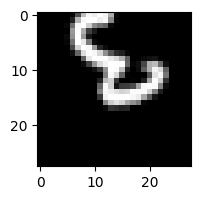

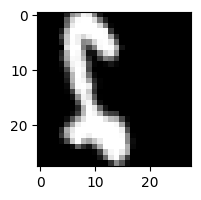

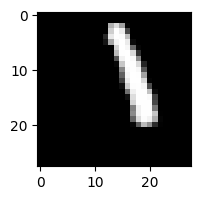

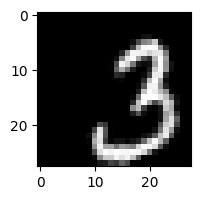

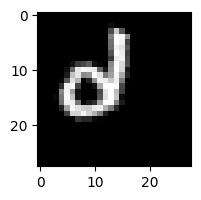

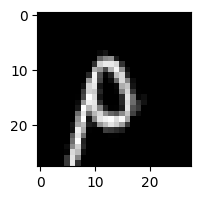

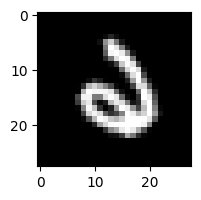

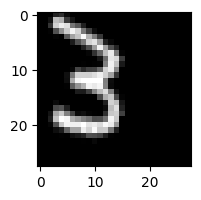

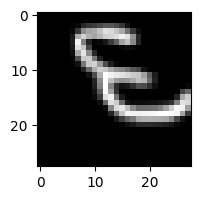

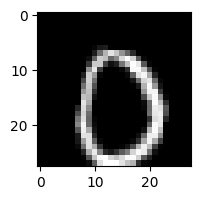

In [37]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_generator)

for i in range (0,10):
    plt.figure(figsize=(2,2))
    image = x_batch[i]
    plt.imshow(image, cmap='gray')
    plt.show()

Há dois pontos importantes:

- 1. O ImageDataGenerator não está retornando os dados originais + os dados transformados — a classe retorna apenas os dados transformados aleatoriamente. Chamamos isso de aumento de dados “no local” e “on-the-fly” porque esse aumento é feito no momento do treinamento (ou seja, não estamos gerando esses exemplos antes do tempo/antes do treinamento).

- 2. Quando o modelo está sendo treinado, podemos pensar em nosso ImageDataGenerator class como “interceptador” dos dados originais, transformando-os aleatoriamente e, em seguida, devolvendo-os à rede neural para treinamento,

O objetivo da técnica de aumento de dados é garantir que a rede veja “novas” imagens que nunca “viu” antes em cada época. Para atingir esse objetivo, “substituímos” os dados de treinamento por dados aumentados e transformados aleatoriamente.

Na prática, isso leva a um modelo que funciona melhor em nossos dados de validação/teste, mas talvez tenha um desempenho um pouco pior em nossos dados de treinamento (devido às variações nos dados causadas pelas transformações aleatórias).

Fonte: [Pyimagesearch](https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)

**Referências e Materiais de Apoio**

Deep Learning. Ian Godfellow, Yoshua Bengio

Deep Learning with Python, second edition. François Chollet

Deep Learning: A Practitioner's Approach
Drive into Deep Learning (https://d2l.ai)

Links:

https://www.deeplearningbook.com.br

https://keras.io

https://www.tensorflow.org/tutorials

https://ml4a.github.io/ml4a/how_neural_networks_are_trained/

____
____
____

## Exercício

Utilize o dataset de classificação de imagens de cães e gatos para criar um modelo de CNN.

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images = []
    labels = []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train = []
y_train = []

x_test = []
y_test = []

In [ ]:
images, labels = load_images_from_path('train/train/dog', 0)
show_images(images)
       
x_train += images
y_train += labels

In [ ]:
images, labels = load_images_from_path('train/train/cat', 1)
show_images(images)
       
x_train += images
y_train += labels

In [ ]:
images, labels = load_images_from_path('train/val/dog', 0)
x_test += images
y_test += labels

images, labels = load_images_from_path('train/val/cat', 1)
x_test += images
y_test += labels

In [ ]:
print(type(x_train))
print(type(y_train))

In [ ]:
# Converte lista para array
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Ele vai dar erro na hora de rodarmos o datagen porque na hora de separar o train, val ele pega o final do dataset como validação e como só appendamos uma classe na outra isso vai fazer com que o dataset de validação tenha apenas uma classe.

ValueError: Training and validation subsets have different number of classes after the split. If your numpy arrays are sorted by the label, you might want to shuffle them.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.2, stratify=y_train, random_state=42)


____
____

Outras bases para treino:

[Classificação de uso da terra utilizando imagens do satélite Landsat](https://www.kaggle.com/datasets/ryanholbrook/eurosat)

[Linguagem de Sinais](https://www.kaggle.com/code/alincijov/signs-detection-transfer-learning/data)

[Detectar doença no tomate](https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf)

____
____
____

<center>
<img src=https://i.pinimg.com/564x/6d/f3/27/6df3274f6559eae490a0fe94eaa6c3b0.jpg width=400>
</center>


<img src=https://coolgpu.github.io/coolgpu_blog/assets/images/Conv2d_0p_1s_3inCh.gif width=500 text="https://coolgpu.github.io/coolgpu_blog/github/pages/2020/10/04/convolution.html">